In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Dataset information
datasets = ["SMAP", "MSL", "SMD"]
num_entities = [55, 27, 28]
num_dimensions = [25, 55, 38]
training_sizes = [135183, 58317, 708405]
testing_sizes = [427617, 73729, 708420]
anomaly_ratios = [13.13, 10.72, 4.16]

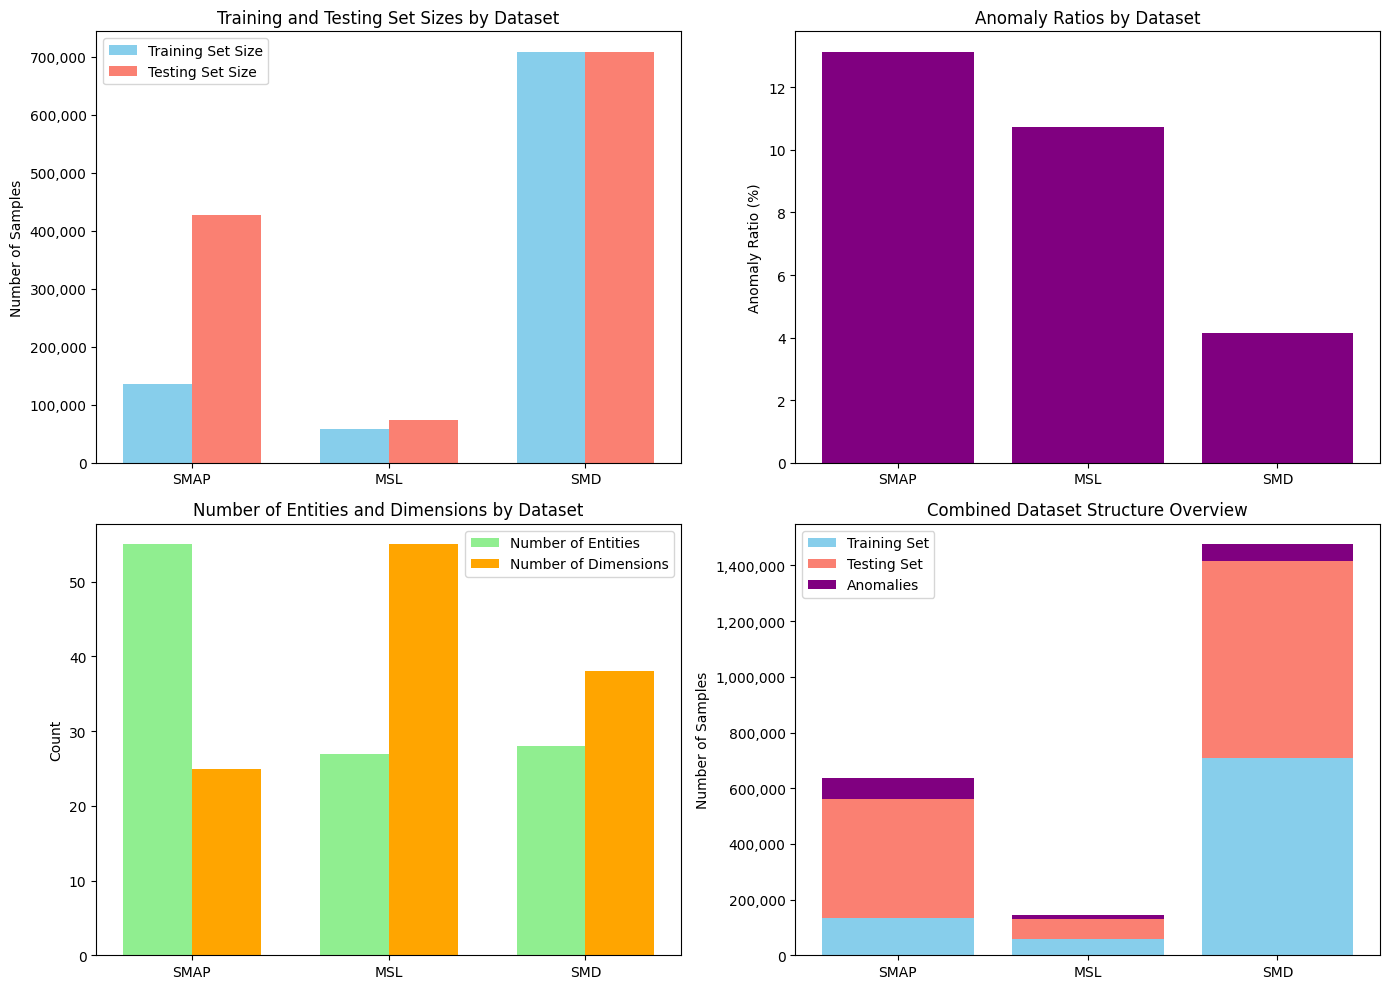

In [8]:
import matplotlib as mpl

# Set up figure and axes for subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

for ax in axs.flat:
    ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
# 1. Bar chart for Training and Testing Set Sizes
x = np.arange(len(datasets))  # Label locations
width = 0.35  # Bar width

axs[0, 0].bar(x - width/2, training_sizes, width, label='Training Set Size', color='skyblue')
axs[0, 0].bar(x + width/2, testing_sizes, width, label='Testing Set Size', color='salmon')
axs[0, 0].set_title("Training and Testing Set Sizes by Dataset")
axs[0, 0].set_xticks(x)
axs[0, 0].set_xticklabels(datasets)
axs[0, 0].set_ylabel("Number of Samples")
axs[0, 0].legend()

# 2. Bar chart for Anomaly Ratios
axs[0, 1].bar(datasets, anomaly_ratios, color='purple')
axs[0, 1].set_title("Anomaly Ratios by Dataset")
axs[0, 1].set_ylabel("Anomaly Ratio (%)")

# 3. Bar chart for Number of Entities and Dimensions
width = 0.35
axs[1, 0].bar(x - width/2, num_entities, width, label='Number of Entities', color='lightgreen')
axs[1, 0].bar(x + width/2, num_dimensions, width, label='Number of Dimensions', color='orange')
axs[1, 0].set_title("Number of Entities and Dimensions by Dataset")
axs[1, 0].set_xticks(x)
axs[1, 0].set_xticklabels(datasets)
axs[1, 0].set_ylabel("Count")
axs[1, 0].legend()

# 4. Stacked Bar Chart for Dataset Summary
total_sizes = [training_sizes[i] + testing_sizes[i] for i in range(len(datasets))]
anomaly_sizes = [total_sizes[i] * (anomaly_ratios[i] / 100) for i in range(len(datasets))]

axs[1, 1].bar(datasets, training_sizes, label="Training Set", color='skyblue')
axs[1, 1].bar(datasets, testing_sizes, bottom=training_sizes, label="Testing Set", color='salmon')
axs[1, 1].bar(datasets, anomaly_sizes, bottom=[training_sizes[i] + testing_sizes[i] for i in range(len(datasets))], 
               label="Anomalies", color='purple')
axs[1, 1].set_title("Combined Dataset Structure Overview")
axs[1, 1].set_ylabel("Number of Samples")
axs[1, 1].legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()
